In [8]:
import pandas as pd
import numpy as np
from math import exp, log
from sklearn.preprocessing import MinMaxScaler

advertising = pd.read_csv('C:/Users/wnl10\PycharmProjects/ai_semiconductor/lecture7/advertising.csv')
Xdf = advertising[['Daily Time Spent on Site', 'Daily Internet Usage']]
Ydf = advertising['Clicked on Ad']

# # Normalize Xdf
# Xdf_norm = (Xdf - Xdf.min()) / (Xdf.max() - Xdf.min())
# Xdf_norm.head()

# Convert dataframe format to list to fit-in out model
# X = Xdf_norm.values.tolist()
scaler = MinMaxScaler()
scaler.fit(Xdf.values)
X = scaler.transform(Xdf.values)
Y = Ydf.values.tolist()


class logisitic_regression_model():
    def __init__(self, X, Y):
        self.w = np.random.normal(size=len(X[0]))
        self.b = np.random.random_sample()
        self.X = np.asarray(X)
        self.Y = Y

    def sigmoid(self, z):
        result = 1 / (1 + exp(-z))
        result = np.minimum(result, 0.999999999)
        result = np.maximum(result, 0.000000001)
        return result

    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

    def train(self, lr=0.5):
        dw = np.array([0.0 for _ in range(len(self.X[0]))])
        db = 0.0
        m = len(self.X)
        cost = 0.0
        for x, y in zip(self.X, self.Y):
            y_hat = model.predict(x)
            if y == 1:
                cost -= log(y_hat)
            else:
                cost -= log(1 - y_hat)
            dw += (y_hat - y) * np.asarray(x)
            db += (y_hat - y)
        cost /= m
        self.w -= lr * dw / m
        self.b -= lr * db / m
        return cost


model = logisitic_regression_model(X, Y)
for epoch in range(1000):
    cost = model.train()
print(model.predict(scaler.transform([[50, 270]])[0]))
print(model.predict(scaler.transform([[50, 125]])[0]))


0.09998002567005901
0.9837694046702313


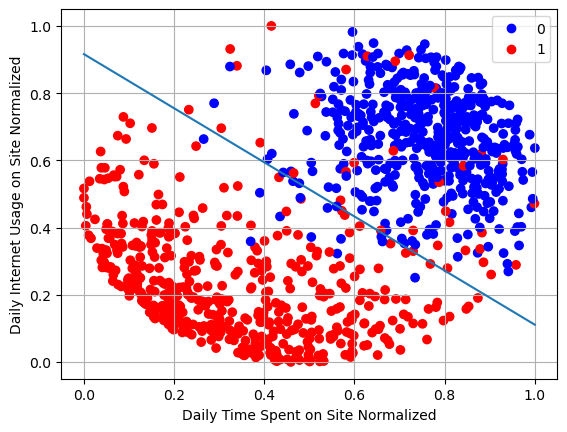

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

colors = ListedColormap(['blue', 'red'])
X1 = [i[0] for i in X]
X2 = [i[1] for i in X]
plt.figure()
scatter = plt.scatter(x=X1, y=X2, c=Y, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['0', '1'])
plt.xlabel('Daily Time Spent on Site Normalized')
plt.ylabel('Daily Internet Usage on Site Normalized')
plt.grid()

a = -model.w[0] / model.w[1]
c = -model.b / model.w[1]
plt.plot(np.array([0, 1]), a * np.array([0, 1]) + c)
